___
# Ciência dos Dados - PROJETO 1

# Giovana Cristina Rocha Lemes

# Como a infraestrutura do estado influência no acesso à internet e TV? 
(analisando os principais estados de cada região do Brasil)

# Acesso à internet e Tv

___
## Introdução

Descreva aqui o que pretende analisar!

Capriche no português!! 
Se quiser pode utilizar pesquisas semelhantes publicadas em sites confiáveis!!


___
## Análise e Resultados

In [101]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [102]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Giovana Lemes\Documents\GitHub\cienciadosdados


In [103]:
#Se usar o arquivo descompactado
#pd.read_csv('DOM2015.csv',sep=',')

#Se usar o arquivo compactado como está no dropbox púbico
Documento = pd.read_csv('DOM2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [104]:
#tabela = pd.DataFrame({"Unidade da Federação":Documento.UF,"Tem televisão com recepçao de sinal digital de tv aberta":Documento.V02273, "Tem televisão com antena parabólica": Documento.V02274, "Tem acesso à Internet no próprio domicilio": Documento.V02322, "Para acessar à Internet utiliza-se telefone celular":Documento.V02324, "O acesso à Internet é feito através de sinal de rede celular 3G ou 4G":Documento.V02424,"O acesso à Internet é feito através de conexão discada por linha telefônica":Documento.V02425})
tabela_resumida = Documento.loc[ : ,["UF","V02273","V02274","V02322","V02324","V02424","V02425","V4622","V4624","V02426","V0219", "V0218", "V0217", "V0212"]]
tabela_resumida.to_csv("resumo.csv")

In [113]:
tabela_não_nula = tabela_resumida#[pd.notnull(Documento.UF)& pd.notnull(Documento.V02273)& pd.notnull(Documento.V02274) & pd.notnull(Documento.V02322)& pd.notnull(Documento.V02324)& pd.notnull(Documento.V02424)& pd.notnull(Documento.V02425)& pd.notnull(Documento.V4622)& pd.notnull(Documento.V4624)& pd.notnull(Documento.V02426)& pd.notnull(Documento.V0219)& pd.notnull(Documento.V0218)& pd.notnull(Documento.V0217)& pd.notnull(Documento.V0212)   ]
#Código para renomear
#tabela_não_nula = tabela_não_nula.rename(columns = {"V02273":"Tem televisão com recepçao de sinal digital de tv aberta",  "V02274":"Tem televisão com antena parabólica", "V02322":"Tem acesso à Internet no próprio domicilio", "V02324":"Para acessar à Internet utiliza-se telefone celular", "V02424":"O acesso à Internet é feito através de sinal de rede celular 3G ou 4G","V02425":"O acesso à Internet é feito através de conexão discada por linha telefônica"})
tabela_não_nula.V02273 = Documento.V02273.astype('category')
tabela_não_nula.V02273.cat.categories = (['Sim','Não','Não Sabe'])
tabela_não_nula.V02274 = Documento.V02274.astype('category')
tabela_não_nula.V02274.cat.categories = (['Sim','Não','Não Sabe'])
tabela_não_nula.V02322 = Documento.V02322.astype('category')
tabela_não_nula.V02322.cat.categories = (['Sim','Não'])
tabela_não_nula.V02324 = Documento.V02324.astype('category')
tabela_não_nula.V02324.cat.categories = (['Sim','Não'])
tabela_não_nula.V02424 = Documento.V02424.astype('category')
tabela_não_nula.V02424.cat.categories = (['Sim','Não'])
tabela_não_nula.V02425 = Documento.V02425.astype('category')
tabela_não_nula.V02425.cat.categories = (['Sim','Não'])
tabela_não_nula.UF = tabela_não_nula.UF.astype('category')
tabela_não_nula.UF.cat.categories = (['Rondônia', 'Acre','Amazonas','Roraima','Pará','Amapá','Tocantins','Maranhão','Piaui','Ceará','Rio Grande do Norte','Paraíba','Pernamnuco','Alagoas','Sergipe','Bahia','Minas Gerais','Espirito Santo','Rio de janeiro','Sâo Paulo','Paraná','Santa Catarina','Rio Grande do Sul','Mato Grosso do Sul','Mato Grosso','Goiás','Distrito Federal'])

tabela_não_nula.V4622 = Documento.V4622.astype('category')
tabela_não_nula.V4622.cat.categories = (['Sem rendimento','Até ¼ salário mínimo','Mais de ¼ até ½ salário mínimo','Mais de ½ até 1 salário mínimo','Mais de 1 até  2 salários mínimos','Mais de  2 até  3 salários mínimos','Mais de 3 até 5 salários mínimos','Mais de 5 salários mínimos','Sem declaração'])

tabela_não_nula.V4624 = Documento.V4624.astype('category')
tabela_não_nula.V4624.cat.categories = (['Rede geral com canalização interna','Poço ou nascente com canalização interna','Outra procedência com canalização interna','Rede geral sem canalização interna','Poço ou nascente sem canalização interna','Outra procedência sem canalização interna'])
tabela_não_nula.V02426 = Documento.V02426.astype('category')
tabela_não_nula.V02426.cat.categories = (['Sim','Não'])
tabela_não_nula.V0219 = Documento.V0219.astype('category')
tabela_não_nula.V0219.cat.categories = (['Elétrica (de rede, gerador, solar)','Óleo, querosene ou gás de botijão','Outra forma'])
tabela_não_nula.V0218 = Documento.V0218.astype('category')
tabela_não_nula.V0218.cat.categories = (['Coletado diretamente' , 'Coletado indiretamente', 'Queimado ou enterrado na propriedade','Jogado em terreno baldio ou logradouro','Jogado em rio, lago ou mar','Outro destino'])
tabela_não_nula.V0217 = Documento.V0217.astype('category')
tabela_não_nula.V0217.cat.categories = (['Rede coletora de esgoto ou pluvial','Fossa séptica ligada a rede coletora de esgoto ou pluvial','Fossa séptica não ligada a rede coletora de esgoto ou pluvial','Fossa rudimentar','Vala','Direto para o rio, lago ou mar','Outra forma'])
tabela_não_nula.V0212 = Documento.V0212.astype('category')
tabela_não_nula.V0212.cat.categories = (['Rede geral de distribuição','Poço ou nascente','Outra proveniência'])


#tabela_não_nula[(tabela_não_nula.UF=='Sâo Paulo') | (tabela_não_nula.UF=='Acre') ]
#tabela_não_nula = tabela_não_nula.rename(columns = {"V02273":"Tem televisão com recepçao de sinal digital de tv aberta",  "V02274":"Tem televisão com antena parabólica", "V02322":"Tem acesso à Internet no próprio domicilio", "V02324":"Para acessar à Internet utiliza-se telefone celular", "V02424":"O acesso à Internet é feito através de sinal de rede celular 3G ou 4G","V02425":"O acesso à Internet é feito através de conexão discada por linha telefônica","V4622": "Faixa do rendimento mensal domiciliar per capita ", "V4624": "Forma de abastecimento de água" , "V02426": "O acesso à Internet é feito por banda larga", "V0219":"Forma de iluminação do domicílio", "V0218": "Destino do lixo domiciliar ", "V0217": "Forma de escoadouro do banheiro ou sanitário","V0212": "Proveniência da água canalizada utilizada no domicílio"})
tabela_não_nula


,UF,V02273,V02274,V02322,V02324,V02424,V02425,V4622,V4624,V02426,V0219,V0218,V0217,V0212
0,Rondônia,Sim,Não,Não,NaN,NaN,NaN,Mais de 1 até 2 salários mínimos,Rede geral com canalização interna,NaN,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Fossa rudimentar,Rede geral de distribuição
1,Rondônia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Rondônia,NaN,NaN,Sim,Não,Sim,Não,Mais de 1 até 2 salários mínimos,Rede geral com canalização interna,Sim,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Fossa rudimentar,Rede geral de distribuição
3,Rondônia,Sim,Não,Sim,Sim,Sim,Não,Mais de 1 até 2 salários mínimos,Poço ou nascente com canalização interna,Sim,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Fossa rudimentar,Poço ou nascente
4,Rondônia,NaN,NaN,Não,NaN,NaN,NaN,Mais de 3 até 5 salários mínimos,Poço ou nascente com canalização interna,NaN,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Fossa rudimentar,Poço ou nascente
5,Rondônia,Sim,Sim,Sim,Não,Não,Não,Mais de 2 até 3 salários mínimos,Rede geral com canalização interna,Sim,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Fossa rudimentar,Rede geral de distribuição
6,Rondônia,Sim,Não,Não,NaN,NaN,NaN,Mais de ¼ até ½ salário mínimo,Rede geral com canalização interna,NaN,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Fossa rudimentar,Rede geral de distribuição
7,Rondônia,Sim,Não,Não,NaN,NaN,NaN,Mais de 1 até 2 salários mínimos,Rede geral com canalização interna,NaN,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Fossa rudimentar,Rede geral de distribuição
8,Rondônia,Sim,Não,Sim,Sim,Sim,Não,Mais de 1 até 2 salários mínimos,Rede geral com canalização interna,Sim,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Fossa rudimentar,Rede geral de distribuição
9,Rondônia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
#SEPARAÇÃO DAS REGIÕES E SEUS DEVIDOS ESTADOS 
tabela_não_nula[(tabela_não_nula.UF=='Sâo Paulo') | (tabela_não_nula.UF=='Santa Catarina')| (tabela_não_nula.UF=='Goias')| (tabela_não_nula.UF=='Amazonas')| (tabela_não_nula.UF=='Bahia')  ] 

tabela_não_nula.head()

,UF,V02273,V02274,V02322,V02324,V02424,V02425,V4622,V4624,V02426,V0219,V0218,V0217,V0212
0,Rondônia,Sim,Não,Não,NaN,NaN,NaN,Mais de 1 até 2 salários mínimos,Rede geral com canalização interna,NaN,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Fossa rudimentar,Rede geral de distribuição
1,Rondônia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Rondônia,NaN,NaN,Sim,Não,Sim,Não,Mais de 1 até 2 salários mínimos,Rede geral com canalização interna,Sim,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Fossa rudimentar,Rede geral de distribuição
3,Rondônia,Sim,Não,Sim,Sim,Sim,Não,Mais de 1 até 2 salários mínimos,Poço ou nascente com canalização interna,Sim,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Fossa rudimentar,Poço ou nascente
4,Rondônia,NaN,NaN,Não,NaN,NaN,NaN,Mais de 3 até 5 salários mínimos,Poço ou nascente com canalização interna,NaN,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Fossa rudimentar,Poço ou nascente


___
## Conclusão 

Descreva aqui suas conclusões!

In [134]:

tabela_não_nula = tabela_não_nula.rename(columns = {"V02273":"Tem televisão com recepçao de sinal digital de tv aberta",  "V02274":"Tem televisão com antena parabólica", "V02322":"Tem acesso à Internet no próprio domicilio", "V02324":"Para acessar à Internet utiliza-se telefone celular", "V02424":"O acesso à Internet é feito através de sinal de rede celular 3G ou 4G","V02425":"O acesso à Internet é feito através de conexão discada por linha telefônica","V4622":"Faixa do rendimento mensal domiciliar per capita ","V4624":"Forma de abastecimento de água","V02426":"O acesso à Internet é feito por banda larga","V0219":"Forma de iluminação do domicílio","V0218":"Destino do lixo domiciliar ","V0217":"Forma de escoadouro do banheiro ou sanitário","V0212":"Proveniência da água canalizada utilizada no domicílio"})
tabela_não_nula

,UF,Tem televisão com recepçao de sinal digital de tv aberta,Tem televisão com antena parabólica,Tem acesso à Internet no próprio domicilio,Para acessar à Internet utiliza-se telefone celular,O acesso à Internet é feito através de sinal de rede celular 3G ou 4G,O acesso à Internet é feito através de conexão discada por linha telefônica,Faixa do rendimento mensal domiciliar per capita,Forma de abastecimento de água,O acesso à Internet é feito por banda larga,Forma de iluminação do domicílio,Destino do lixo domiciliar,Forma de escoadouro do banheiro ou sanitário,Proveniência da água canalizada utilizada no domicílio
0,Rondônia,Sim,Não,Não,NaN,NaN,NaN,Mais de 1 até 2 salários mínimos,Rede geral com canalização interna,NaN,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Fossa rudimentar,Rede geral de distribuição
1,Rondônia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Rondônia,NaN,NaN,Sim,Não,Sim,Não,Mais de 1 até 2 salários mínimos,Rede geral com canalização interna,Sim,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Fossa rudimentar,Rede geral de distribuição
3,Rondônia,Sim,Não,Sim,Sim,Sim,Não,Mais de 1 até 2 salários mínimos,Poço ou nascente com canalização interna,Sim,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Fossa rudimentar,Poço ou nascente
4,Rondônia,NaN,NaN,Não,NaN,NaN,NaN,Mais de 3 até 5 salários mínimos,Poço ou nascente com canalização interna,NaN,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Fossa rudimentar,Poço ou nascente
5,Rondônia,Sim,Sim,Sim,Não,Não,Não,Mais de 2 até 3 salários mínimos,Rede geral com canalização interna,Sim,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Fossa rudimentar,Rede geral de distribuição
6,Rondônia,Sim,Não,Não,NaN,NaN,NaN,Mais de ¼ até ½ salário mínimo,Rede geral com canalização interna,NaN,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Fossa rudimentar,Rede geral de distribuição
7,Rondônia,Sim,Não,Não,NaN,NaN,NaN,Mais de 1 até 2 salários mínimos,Rede geral com canalização interna,NaN,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Fossa rudimentar,Rede geral de distribuição
8,Rondônia,Sim,Não,Sim,Sim,Sim,Não,Mais de 1 até 2 salários mínimos,Rede geral com canalização interna,Sim,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Fossa rudimentar,Rede geral de distribuição
9,Rondônia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


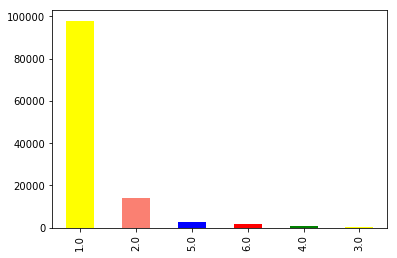

In [142]:
#tabela só de São Paulo
tabela_não_nula[(tabela_não_nula.UF=='Sâo Paulo')]
#Gráfico FORMA DE ABASTECIMENTO SP
abastecimento = Documento.V4624.value_counts()
abastecimento.plot(kind='bar', color=('yellow', 'salmon', 'blue', 'red', 'green'),  legend=False)



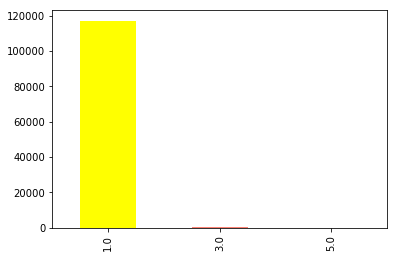

In [140]:
#Gráfico FORMA DE ILUMINAÇÃO SP
iluminacao = Documento.V0219.value_counts()
iluminacao.plot(kind='bar', color=('yellow', 'salmon', 'blue', 'red', 'green'),  legend=False)

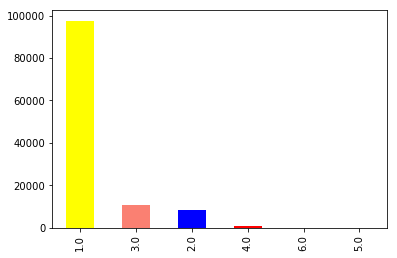

In [143]:
#Gráfico FORMA DE LIXO SP
lixo = Documento.V0218.value_counts()
lixo.plot(kind='bar', color=('yellow', 'salmon', 'blue', 'red', 'green'),  legend=False)

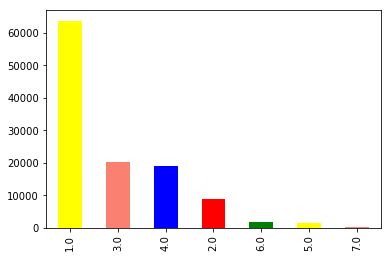

In [144]:
#Gráfico FORMA DE SANITÁRIO SP
Sanitario = Documento.V0217.value_counts()
Sanitario.plot(kind='bar', color=('yellow', 'salmon', 'blue', 'red', 'green'),  legend=False)

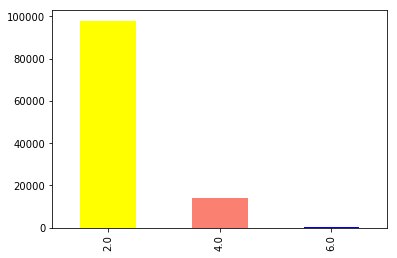

In [145]:
#Gráfico FORMA DE CANALIZADA SP
canalizada = Documento.V0212.value_counts()
canalizada.plot(kind='bar', color=('yellow', 'salmon', 'blue', 'red', 'green'),  legend=False)

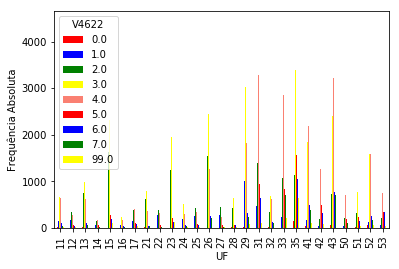

In [147]:
#Gráfico RENDA PELOS ESTADOS
ct1 = pd.crosstab(Documento.UF, Documento.V4622)
ct1.plot(kind='bar', color=('red','blue','green','yellow', 'salmon'))
plt.ylabel('Frequência Absoluta')